# ***Simulating Speckle Noise in an Image***

# Creating Random Phasors:

Importing libraries:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import drive

Uniform Phase Distribution Function:

In [28]:
def UniformPhase(mean,var):

    phase = np.random.uniform(-np.pi,np.pi)

    return phase

Normal Phase Distribution Function:

In [29]:
def NormalPhase(mean,var):

    phase = np.random.normal(mean,np.sqrt(var))

    return phase

Constant Magnitude Function:

In [30]:
def ConstantMag(mean,var):

    mag = mean

    return mag

Normal Magnitude Distribution Function:

In [31]:
def NormalMag(mean,var):

    mag = np.random.normal(mean,np.sqrt(var))

    return mag

Random Phasor Generator Function:

In [32]:
def randomPhasor(magDist,magMean,magVar,phaseDist,phaseMean,phaseVar):

    mag = magDist(magMean,magVar)
    phase = phaseDist(phaseMean,phaseVar)

    phasor = np.multiply(mag,np.exp(1j*phase))

    return phasor

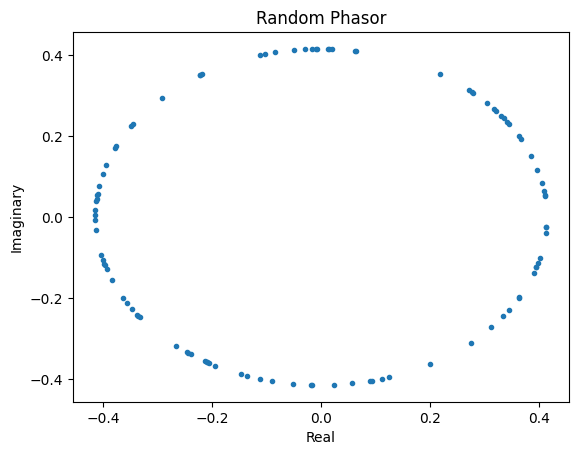

In [33]:
magDist = ConstantMag
phaseDist = UniformPhase

N = 100
phasor = np.zeros(N,dtype=complex)

magMean = np.random.random()
magVar = np.random.random()

phaseMean = np.random.random()
phaseVar = np.random.random()

for i in range(N):
    phasor[i] = randomPhasor(magDist,magMean,magVar,phaseDist,phaseMean,phaseVar)

plt.figure()

plt.scatter(np.real(phasor),np.imag(phasor),marker='.')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Random Phasor')
plt.show()

Random Phasor Sum Function:

In [34]:
def randomPhasorSum(N,magDist,magMean,magVar,phaseDist,phaseMean,phaseVar):
    phasor = np.zeros(N,dtype=complex)

    for i in range(N):
        phasor[i] = randomPhasor(magDist,magMean,magVar,phaseDist,phaseMean,phaseVar)

    phasorsum = np.divide(np.sum(phasor),np.sqrt(N))

    return phasorsum

# Image Processing:

Importing an Image:

In [35]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [43]:
dir = '/content/drive/MyDrive/SpeckleTest'

os.chdir(dir)

In [44]:
!pwd

/content/drive/MyDrive/SpeckleTest


In [45]:
Speckle_images = os.listdir(dir)

In [46]:
pic = cv2.imread(Speckle_images[2])
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)

pic = cv2.resize(pic,(256,256))

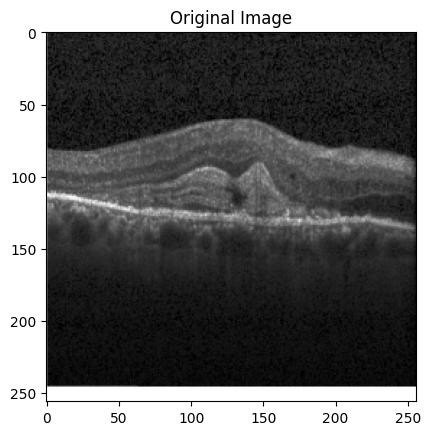

In [47]:
plt.figure()
plt.imshow(np.divide(pic,np.max(np.max(pic))),cmap='gray')
plt.title('Original Image')
plt.show()

In [48]:
pic.shape

(256, 256)

Adding Speckle Noise to Image (α = 10):

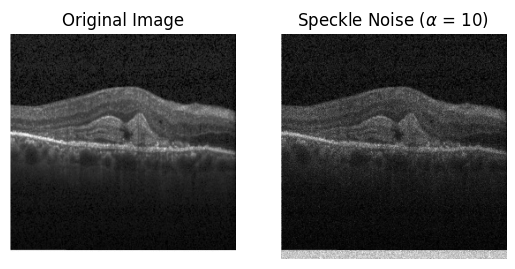

In [60]:
magDist = ConstantMag
phaseDist = UniformPhase

N = 10
H = pic.shape[0]
W = pic.shape[1]

magMean = 10
magVar = 1
phaseMean = 10
phaseVar = 1

phaseSum= np.zeros((H,W),dtype=complex)

for k in range(H):
  for l in range(W):
        phaseSum[k,l] = randomPhasorSum(N,magDist,magMean,magVar,phaseDist,phaseMean,phaseVar)

alpha = 10
newpic = np.add(np.multiply(alpha,np.sqrt(pic)),phaseSum)
newpic = np.square(np.abs(newpic))
newpic = np.divide(newpic,np.max(np.max(newpic)))
newpic = np.multiply(255,newpic)

plt.figure()

# Original Image:
plt.subplot(1,2,1)

plt.imshow(pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Speckled Image:
plt.subplot(1,2,2)

plt.imshow(newpic,cmap='gray')
plt.title('Speckle Noise ($\\alpha$ = 10)')
plt.axis('off')

plt.show()

Adding Speckle Noise to Image (α = 5):

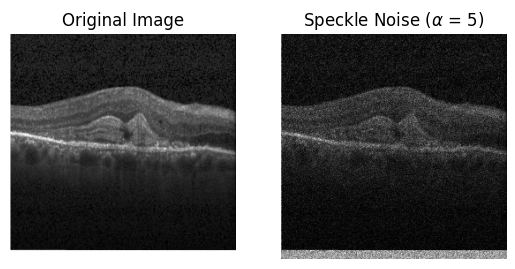

In [61]:
magDist = ConstantMag
phaseDist = UniformPhase

N = 10
H = pic.shape[0]
W = pic.shape[1]

magMean = 10
magVar = 1
phaseMean = 10
phaseVar = 1

phaseSum= np.zeros((H,W),dtype=complex)

for k in range(H):
  for l in range(W):
        phaseSum[k,l] = randomPhasorSum(N,magDist,magMean,magVar,phaseDist,phaseMean,phaseVar)

alpha = 5
newpic = np.add(np.multiply(alpha,np.sqrt(pic)),phaseSum)
newpic = np.square(np.abs(newpic))
newpic = np.divide(newpic,np.max(np.max(newpic)))
newpic = np.multiply(255,newpic)

plt.figure()

# Original Image:
plt.subplot(1,2,1)

plt.imshow(pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Speckled Image:
plt.subplot(1,2,2)

plt.imshow(newpic,cmap='gray')
plt.title('Speckle Noise ($\\alpha$ = 5)')
plt.axis('off')

plt.show()

Adding Speckle Noise to Image (α = 2.5):

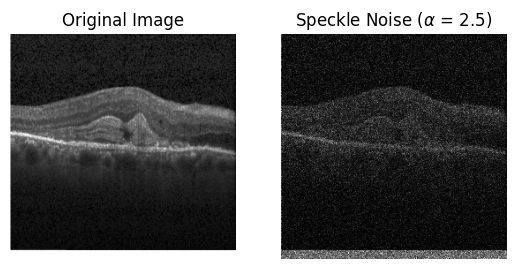

In [62]:
magDist = ConstantMag
phaseDist = UniformPhase

N = 10
H = pic.shape[0]
W = pic.shape[1]

magMean = 10
magVar = 1
phaseMean = 10
phaseVar = 1

phaseSum= np.zeros((H,W),dtype=complex)

for k in range(H):
  for l in range(W):
        phaseSum[k,l] = randomPhasorSum(N,magDist,magMean,magVar,phaseDist,phaseMean,phaseVar)

alpha = 2.5
newpic = np.add(np.multiply(alpha,np.sqrt(pic)),phaseSum)
newpic = np.square(np.abs(newpic))
newpic = np.divide(newpic,np.max(np.max(newpic)))
newpic = np.multiply(255,newpic)

plt.figure()

# Original Image:
plt.subplot(1,2,1)

plt.imshow(pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Speckled Image:
plt.subplot(1,2,2)

plt.imshow(newpic,cmap='gray')
plt.title('Speckle Noise ($\\alpha$ = 2.5)')
plt.axis('off')

plt.show()